# **Data Exploration and Preprocessing**

First import the python library for load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import string
import spacy
from wordcloud import WordCloud
import re
import nltk

In [2]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp=spacy.load('en_core_web_md')

In [4]:
from google.colab import files
upload=files.upload()

Saving blogs.csv to blogs (1).csv


In [5]:
df=pd.read_csv('blogs.csv',skip_blank_lines=False,on_bad_lines='skip')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [6]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df.isnull().sum()

,0
Data,0
Labels,0


In [9]:
len(df)

2000

# Download the NLTK resources

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Text preprocessing

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [12]:
# Text Preprocessing Function
def preprocess_text(text):

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text (split into words)
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (reduce words to their root form)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Return the processed text
    return ' '.join(tokens)

# Apply preprocessing to the 'Data' column (blog post content)
df['cleaned_text'] = df['Data'].apply(preprocess_text)

# View the cleaned text
print(df[['Data', 'cleaned_text']].head())  # Show original and cleaned text side by side

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroup altath path cantaloupesrvcscmueducra...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


# **Convert Text Data into Numerical Format (TF-IDF)**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
#feature Extraction using TF-IDF

tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(df['cleaned_text']).toarray()

#Labels (Target columns for classification)

y=df['Labels']

# **Naive Bayes Model for Text Classification**

In [15]:
# Split the Data into training and test sets
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (1600, 5000)
Testing data shape: (400, 5000)


Build and train the Navie Bayes classifier

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [20]:
y_pred = nb_classifier.predict(x_test)

# Evaluate the model

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8275


In [23]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

Precision: 0.8320


In [24]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

Recall: 0.8275


In [25]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.4f}')

F1-score: 0.8196


In [26]:
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.86      0.86      0.86        21
          comp.windows.x       0.92      0.88      0.90        25
            misc.forsale       0.79      0.61      0.69        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.82      1.00      0.90        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.med       0.88      0.88     

# Sentiment Analysis

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer

Initialize VADER sentiment analyzer

In [28]:
sia = SentimentIntensityAnalyzer()

In [29]:
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
df['sentiment'] = df['Data'].apply(analyze_sentiment)

In [31]:
print(df[['Data', 'sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [32]:
df

,Data,Labels,cleaned_text,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroup altath path cantaloupesrvcscmueducra...,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,Positive
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion120945 ...,Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc837...,Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins41030 ta...,Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc836...,Positive


# Analyze Sentiment Distribution Across Categories

In [33]:
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)

In [34]:
print("\nSentiment Distribution by Category:\n", sentiment_distribution)


Sentiment Distribution by Category:
 sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      0.0 

# Visualize the sentiment Distribution

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

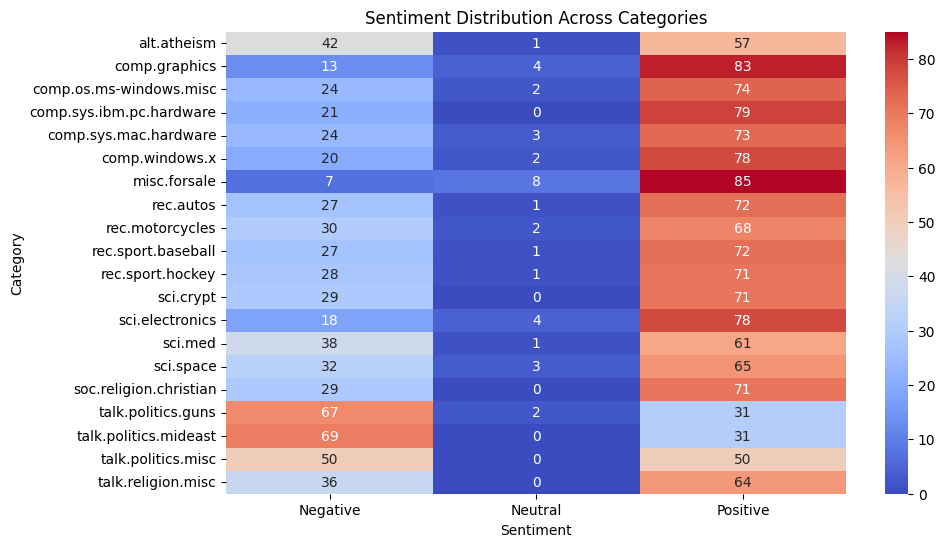

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_distribution, annot=True, cmap='coolwarm', fmt='g')
plt.title('Sentiment Distribution Across Categories')
plt.ylabel('Category')
plt.xlabel('Sentiment')
plt.show()